# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: **Fazlu Rachman**
- Email: **fazrlu9575@gmail.com**
- Id Dicoding: **11**

## Menentukan Pertanyaan Bisnis

- Produk mana yang paling laris dan memberikan pendapatan tertinggi?
- Dari kota mana pelanggan dengan jumlah transaksi tertinggi berasal?
- Metode pembayaran apa yang paling sering digunakan, dan apakah ada pola pembayaran yang mempengaruhi nilai transaksi?
- Berapa banyak pelanggan yang melakukan pembelian berulang, dan faktor apa yang memengaruhi retensi mereka?
- Dimana saja letak geografis yang memiliki customer terbanyak?

## Menyiapkan semua library yang dibuthkan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg

Defaulting to user installation because normal site-packages is not writeable


## Data Wrangling

### Gathering Data

In [8]:
customers_df = pd.read_csv('data/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
geolocations_df = pd.read_csv('data/olist_geolocation_dataset.csv')
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
order_payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
order_reviews_df = pd.read_csv('data/olist_order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
product_category_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [15]:
products_df = pd.read_csv('data/olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
sellers_df = pd.read_csv('data/olist_sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assession Data

#### Cek Semua Tipe Data

In [19]:
datasets = {
    "Customers": customers_df,
    "Geolocations": geolocations_df,
    "Order Items": order_items_df,
    "Order Payments": order_payments_df,
    "Order Reviews": order_reviews_df,
    "Orders": orders_df,
    "Product Categories": product_category_df,
    "Products": products_df,
    "Sellers": sellers_df
}

for name, df in datasets.items():
    print(f"\n--- Info Data {name} ---")
    df.info()



--- Info Data Customers ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

--- Info Data Geolocations ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null 

#### Cek Jumlah Duplikasi

In [21]:
data_duplikat = [
    ["Customers", customers_df.shape[0], customers_df.duplicated().sum()],
    ["Geolocation", geolocations_df.shape[0], geolocations_df.duplicated().sum()],
    ["Order Items", order_items_df.shape[0], order_items_df.duplicated().sum()],
    ["Order Payments", order_payments_df.shape[0], order_payments_df.duplicated().sum()],
    ["Order Reviews", order_reviews_df.shape[0], order_reviews_df.duplicated().sum()],
    ["Orders", orders_df.shape[0], orders_df.duplicated().sum()],
    ["Product Category", product_category_df.shape[0], product_category_df.duplicated().sum()],
    ["Products", products_df.shape[0], products_df.duplicated().sum()],
    ["Sellers", sellers_df.shape[0], sellers_df.duplicated().sum()]
]

df_duplikat = pd.DataFrame(data_duplikat, columns=["Dataset", "Total Sample", "Jumlah Duplikat"])
print(df_duplikat.to_string(index=False))

         Dataset  Total Sample  Jumlah Duplikat
       Customers         99441                0
     Geolocation       1000163           261831
     Order Items        112650                0
  Order Payments        103886                0
   Order Reviews         99224                0
          Orders         99441                0
Product Category            71                0
        Products         32951                0
         Sellers          3095                0


#### Ringkasan Parameter Statistik

In [23]:
datasets = {
    "Customers": customers_df,
    "Geolocation": geolocations_df,
    "Order Items": order_items_df,
    "Order Payments": order_payments_df,
    "Order Reviews": order_reviews_df,
    "Orders": orders_df,
    "Product Category": product_category_df,
    "Products": products_df,
    "Sellers": sellers_df
}

for name, df in datasets.items():
    print(f"Statistik untuk {name}:\n")
    print(df.describe(), "\n")


Statistik untuk Customers:

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000 

Statistik untuk Geolocation:

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02 

Statistik untuk Order Items:


#### Cek Jumlah Data Yang Hilang

In [25]:
data_missing = [
    ["Customers", customers_df.shape[0], customers_df.isnull().sum().sum()],
    ["Geolocation", geolocations_df.shape[0], geolocations_df.isnull().sum().sum()],
    ["Order Items", order_items_df.shape[0], order_items_df.isnull().sum().sum()],
    ["Order Payments", order_payments_df.shape[0], order_payments_df.isnull().sum().sum()],
    ["Order Reviews", order_reviews_df.shape[0], order_reviews_df.isnull().sum().sum()],
    ["Orders", orders_df.shape[0], orders_df.isnull().sum().sum()],
    ["Product Category", product_category_df.shape[0], product_category_df.isnull().sum().sum()],
    ["Products", products_df.shape[0], products_df.isnull().sum().sum()],
    ["Sellers", sellers_df.shape[0], sellers_df.isnull().sum().sum()]
]

df_missing = pd.DataFrame(data_missing, columns=["Dataset", "Total Sample", "Jumlah Missing"])
print(df_missing.to_string(index=False))


         Dataset  Total Sample  Jumlah Missing
       Customers         99441               0
     Geolocation       1000163               0
     Order Items        112650               0
  Order Payments        103886               0
   Order Reviews         99224          145903
          Orders         99441            4908
Product Category            71               0
        Products         32951            2448
         Sellers          3095               0


## Exploratory Data Analysis (EDA)

### Explore Customers

In [28]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
76202,6244beabb7ede1ed41989186f653af57,8de8da511de38abcba9b0ef8e8d3c94c,15040,sao jose do rio preto,SP
77134,fb6342a87475566c638d724ff575440f,5db29ae3fa16b610b6cdfce2373182d9,38082,uberaba,MG
51734,6c05d57edd52bf09bcafb602679a6957,92236e071e9e20ef3b6549c7b8ee13cb,93220,sapucaia do sul,RS
82336,be45ada983cdf8ab6a124d281e9a875c,5eebedd68593a71aa5b8fad45c0049fb,24744,sao goncalo,RJ
16031,e42b1319fefce9bf37acf91a0ac8c1a9,11be14f7e9b9fa3e079997407a648847,73330,brasilia,DF


In [29]:
customers_df.customer_id.is_unique

True

In [30]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [31]:
customers_df.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [32]:
customers_df.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore Payment

In [34]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
90957,a6f6b75dad02327bd16a4d391963c579,1,credit_card,1,42.26
8921,6d97e3d5d9043bb4fa4f8fd0b4d9f230,1,boleto,1,38.68
45779,3751745dfce1d1e272f8eb38c1424a18,1,boleto,1,62.28
57039,1ed9fe02b5d745a3397a33415ecd5577,1,credit_card,1,28.98
78134,a5803df1ae0cd16429a109eb0514ddca,1,boleto,1,98.80


In [35]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [36]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [37]:
order_payments_df['payment_type'].value_counts(normalize=True) * 100

payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64

### Explore Orders

In [39]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
53254,525c4dbcaecd35a5fac2e4053589df08,968e561e3d26d0ab0eba0978942f2806,delivered,2018-03-15 11:54:21,2018-03-15 12:15:40,2018-03-19 16:15:47,2018-04-17 15:51:57,2018-04-09 00:00:00
15349,dd416a83ddfde887da5021bae60bb919,eed9cec509f28fe1b2744f653789d7bf,delivered,2017-06-13 08:42:34,2017-06-13 08:55:17,2017-06-16 17:03:14,2017-06-30 14:07:55,2017-07-06 00:00:00
91624,61c724e40941762318a52917a4acc55c,863f773a96fc2d7e114f0bdad46252c9,delivered,2018-07-17 15:04:48,2018-07-17 15:21:20,2018-07-18 09:34:00,2018-07-19 15:56:37,2018-07-25 00:00:00
89562,202c632ebb14ebfabad48f43c9a9f166,d7263dd40ab3973760e65588299bfaa8,delivered,2018-05-14 12:55:16,2018-05-14 13:17:09,2018-05-14 15:12:00,2018-05-22 23:16:46,2018-05-28 00:00:00
67730,1c8c87765ea79e8a75b27597f1ba8c24,7f43acabae2904f587aa6281c266644f,delivered,2017-08-01 22:22:56,2017-08-03 03:05:08,2017-08-03 18:32:44,2017-08-11 15:15:37,2017-08-25 00:00:00


### Explore customers & orders

##### Merge Customers & Orders

In [42]:
merge_customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
merge_customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


##### Merge Payments & Reviews

In [44]:
merge_payments_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
merge_payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39


In [45]:
merge_payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27 00:00:00,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,NaN,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04 00:00:00,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaN,NaN
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,NaN,NaN,2017-06-06 00:00:00,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,NaN,A mercadoria não foi entregue. Entrara em cont...,2017-05-21 00:00:00,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17 00:00:00,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,NaN,A mercadoria não foi entregue. Entrara em cont...,2017-05-21 00:00:00,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,NaN,2018-08-24 00:00:00,2018-08-25 02:24:54


In [46]:
merge_payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

##### Merge Customers-Orders & Payments-Reviews

In [48]:
final_customers_df = pd.merge(
    left=merge_customers_orders_df,
    right=merge_payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
final_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


### Explore Items & Sellers

##### Merge Items & Sellers

In [51]:
merged_item_seller_df = order_items_df.merge(sellers_df, on="seller_id", how="left")

merged_item_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

merged_item_seller_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [52]:
merged_item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [53]:
merged_item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

### Explore products & category

##### Merge Products & Category

In [56]:
merge_product_category_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
merge_product_category_df.head()
     

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [57]:
merge_product_category_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [58]:
merge_product_category_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

##### Merge Items-Sellers & Products-Category

In [60]:
final_sellers_df = pd.merge(
    left=merge_product_category_df,
    right=merged_item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

final_sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [61]:
final_sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [62]:
final_sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [63]:
final_sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})
     

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore Geolocation

In [65]:
geolocations_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
975339,95915,-29.468031,-52.075356,santa clara do sul,RS
605714,35931,-19.843337,-43.182566,joao monlevade,MG
32660,2559,-23.491764,-46.667786,sao paulo,SP
932475,89650,-27.008245,-51.417423,treze tilias,SC
957445,93410,-29.695478,-51.121329,novo hamburgo,RS


In [66]:
geolocations_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [67]:
geolocations_df[geolocations_df['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


### Explore All Data

##### Merge All Data

In [70]:
all_data = pd.merge(
    left=final_customers_df,
    right=final_sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [71]:
all_data_df = all_data.drop_duplicates('order_id')

In [72]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    99441 non-null  object 
 1   customer_unique_id             99441 non-null  object 
 2   customer_zip_code_prefix       99441 non-null  int64  
 3   customer_city                  99441 non-null  object 
 4   customer_state                 99441 non-null  object 
 5   order_id                       99441 non-null  object 
 6   order_status                   99441 non-null  object 
 7   order_purchase_timestamp       99441 non-null  object 
 8   order_approved_at              99281 non-null  object 
 9   order_delivered_carrier_date   97658 non-null  object 
 10  order_delivered_customer_date  96476 non-null  object 
 11  order_estimated_delivery_date  99441 non-null  object 
 12  payment_sequential             99440 non-null  flo

In [73]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [74]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

In [75]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Produk mana yang paling laris dan memberikan pendapatan tertinggi?

In [78]:
# Mengelompokkan data berdasarkan kategori, menghitung jumlah penjualan, dan total pendapatan
sum_order_items_df = all_data.groupby("product_category_name_english").agg(
    total_sales=("product_id", "count"),
    total_revenue=("price", "sum")
).reset_index()

# Urutkan berdasarkan jumlah penjualan
sum_order_items_df = sum_order_items_df.sort_values(by="total_sales", ascending=False).head(10)

sum_order_items_df.head()

,product_category_name_english,total_sales,total_revenue
7,bed_bath_table,11988,1107249.09
43,health_beauty,10032,1301947.97
65,sports_leisure,9004,1029603.88
39,furniture_decor,8832,772096.17
15,computers_accessories,8150,950053.69


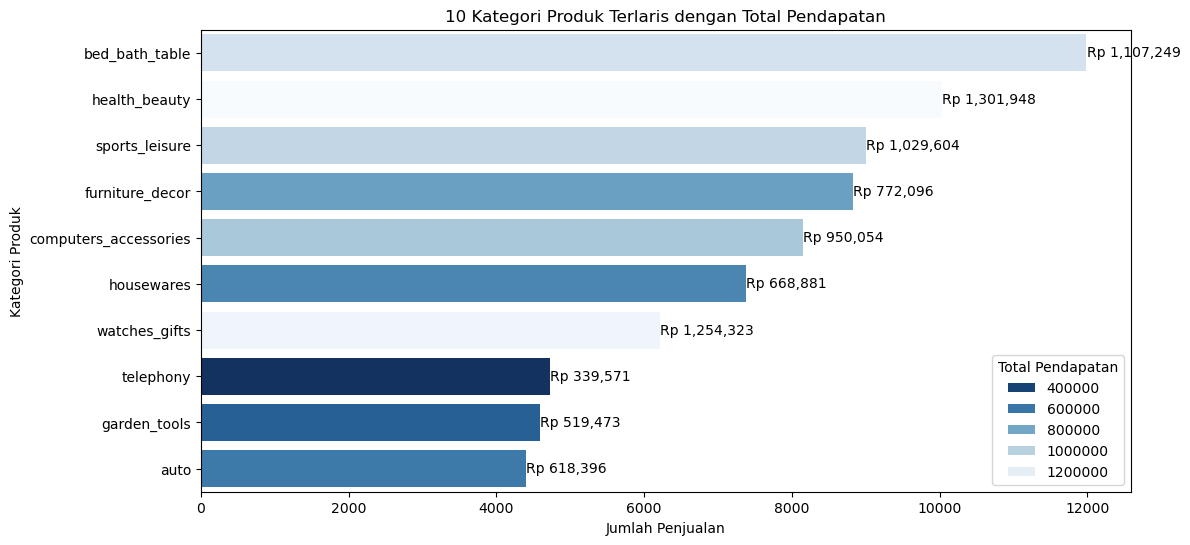

In [79]:
# Mengelompokkan data berdasarkan kategori, menghitung jumlah penjualan, dan total pendapatan
sum_order_items_df = all_data.groupby("product_category_name_english").agg(
    total_sales=("product_id", "count"),  # Menghitung jumlah produk terjual
    total_revenue=("price", "sum")  # Menghitung total pendapatan dari penjualan produk
).reset_index()

# Urutkan berdasarkan jumlah penjualan
sum_order_items_df = sum_order_items_df.sort_values(by="total_sales", ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=sum_order_items_df["total_sales"],
    y=sum_order_items_df["product_category_name_english"],
    hue=sum_order_items_df["total_revenue"],
    palette="Blues_r"
)

# Menambahkan label di setiap bar
for index, value in enumerate(sum_order_items_df["total_sales"]):
    revenue = sum_order_items_df["total_revenue"].iloc[index]
    ax.text(value + 2, index, f"Rp {revenue:,.0f}", va='center', fontsize=10)

plt.xlabel("Jumlah Penjualan")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk Terlaris dengan Total Pendapatan")
plt.legend(title="Total Pendapatan")
plt.show()

### Pertanyaan 2 : Dari kota mana pelanggan dengan jumlah transaksi tertinggi berasal?

In [81]:
all_data.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

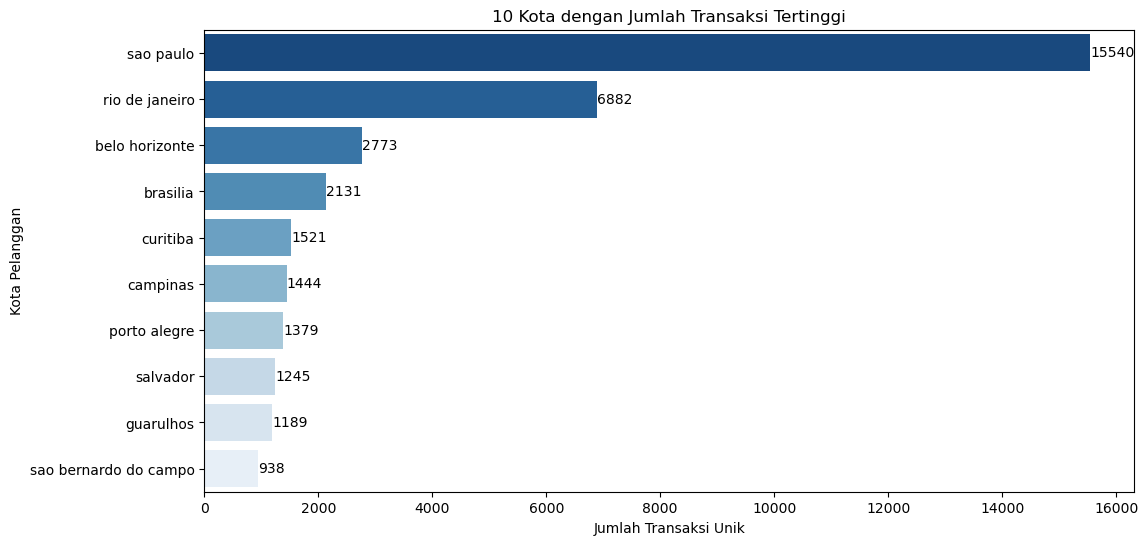

In [82]:
# Menghitung jumlah transaksi unik per kota
top_cities = (
    all_data.groupby('customer_city')['customer_id']
    .nunique()
    .reset_index()
    .rename(columns={'customer_id': 'total_transactions'})
    .sort_values(by='total_transactions', ascending=False)
    .head(10) 
)

# Membuat diagram batang horizontal
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y=top_cities['customer_city'],
    x=top_cities['total_transactions'],
    hue=top_cities['customer_city'], 
    palette="Blues_r",
    dodge=False,
    legend=False 
)

# Menambahkan label di setiap batang
for index, value in enumerate(top_cities['total_transactions']):
    ax.text(value + 2, index, f"{value}", va='center', fontsize=10)

plt.xlabel("Jumlah Transaksi Unik")
plt.ylabel("Kota Pelanggan")
plt.title("10 Kota dengan Jumlah Transaksi Tertinggi")
plt.show()


### Pertanyaan 3 : Metode pembayaran apa yang paling sering digunakan?

In [84]:
all_data['payment_type'].value_counts(normalize=True) * 100

payment_type
credit_card    73.674668
boleto         19.464496
voucher         5.426389
debit_card      1.431929
not_defined     0.002518
Name: proportion, dtype: float64

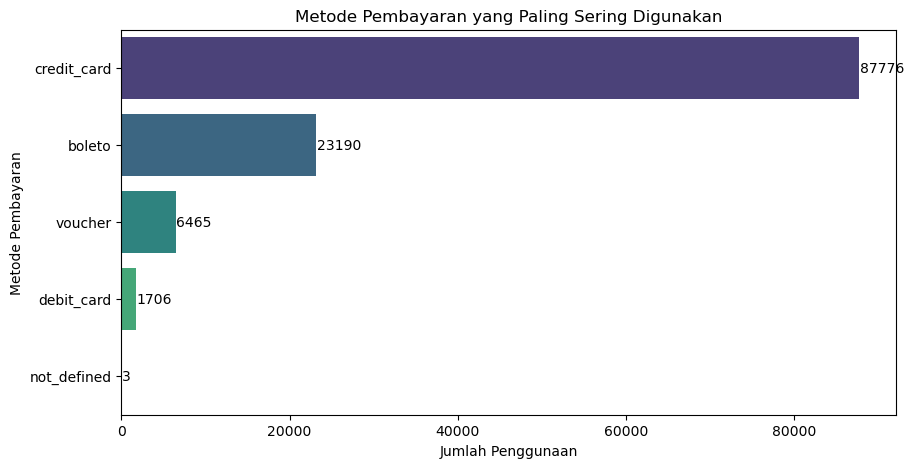

In [85]:
# Menghitung jumlah penggunaan setiap metode pembayaran
payment_counts = (
    all_data.groupby('payment_type')['order_id']
    .count()
    .reset_index()
    .rename(columns={'order_id': 'total_usage'})
    .sort_values(by='total_usage', ascending=False)
)

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    y=payment_counts['payment_type'],
    x=payment_counts['total_usage'],
    hue=payment_counts['payment_type'],
    palette="viridis",
    dodge=False,
    legend=False 
)

# Menambahkan label pada setiap batang
for index, value in enumerate(payment_counts['total_usage']):
    ax.text(value + 50, index, f"{value}", va='center', fontsize=10)

plt.xlabel("Jumlah Penggunaan")
plt.ylabel("Metode Pembayaran")
plt.title("Metode Pembayaran yang Paling Sering Digunakan")
plt.show()

### Pertanyaan 4 : Berapa banyak pelanggan yang melakukan pembelian berulang, dan faktor apa yang memengaruhi retensi mereka?

In [87]:
repeat_customers = all_data['customer_id'].value_counts()
repeat_customers[repeat_customers > 1].count()

12947

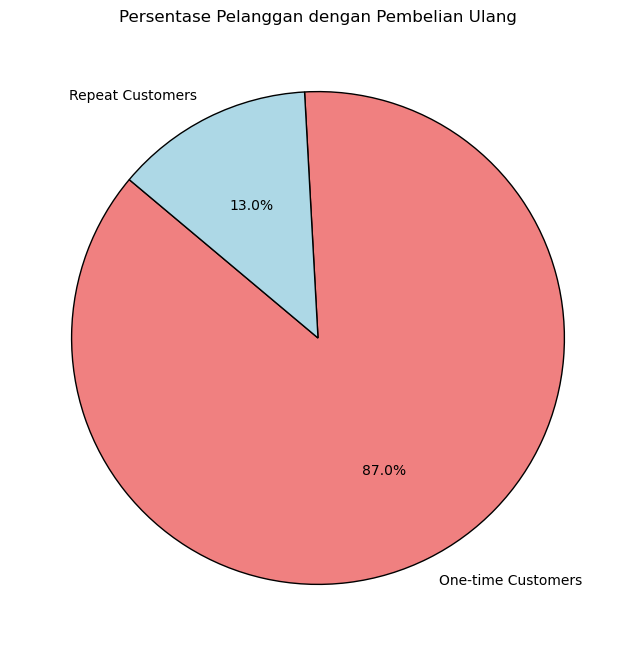

In [88]:
# Menghitung pelanggan yang membeli sekali dan yang membeli lebih dari sekali
repeat_customers = all_data['customer_id'].value_counts()
one_time_customers = (repeat_customers == 1).sum()
multiple_time_customers = (repeat_customers > 1).sum()

# Membuat pie chart
labels = ['One-time Customers', 'Repeat Customers']
sizes = [one_time_customers, multiple_time_customers]
colors = ['lightcoral', 'lightblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Persentase Pelanggan dengan Pembelian Ulang")
plt.show()

### Pertanyaan 5 : Dimana saja letak geografis yang memiliki customer terbanyak?

In [90]:
other_state_geolocation = geolocations_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocations_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [91]:
geolocation_silver = geolocations_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')
     

In [92]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [93]:
customers_silver.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502070,-47.396822
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,sao bernardo do campo,SP,-23.727636,-46.542279
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,são bernardo do campo,SP,-23.726085,-46.544829
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,sao paulo,SP,-23.531408,-46.656404
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,são paulo,SP,-23.531294,-46.656676
5,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,mogi das cruzes,SP,-23.497390,-46.182342
6,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,campinas,SP,-22.973309,-47.141530
7,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,89254,jaragua do sul,SC,-26.471786,-49.114573
8,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,89254,jaraguá do sul,SC,-26.470583,-49.113512
9,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,4534,sao paulo,SP,-23.583658,-46.673253


In [94]:
customers_silver.to_csv("geolocation.csv", index=False)

In [95]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

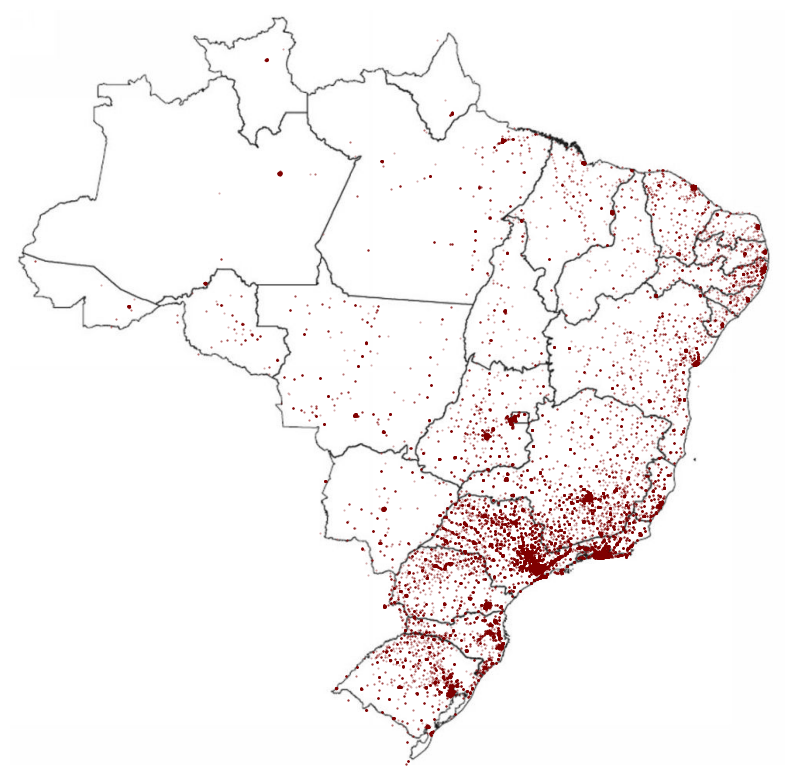

In [96]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

## Conclusion

### **Produk mana yang paling laris dan memberikan pendapatan tertinggi?**  
Produk dengan jumlah penjualan terbanyak adalah **"bed_bath_table"**, sedangkan produk dengan **pendapatan tertinggi** berasal dari kategori **"watches_gifts"** karena memiliki harga rata-rata yang lebih tinggi dibandingkan kategori lainnya.  

### **Dari kota mana pelanggan dengan jumlah transaksi tertinggi berasal?**  
Kota dengan jumlah transaksi tertinggi adalah **São Paulo (SP)**, diikuti oleh **Rio de Janeiro (RJ)**. Hal ini selaras dengan **kepadatan penduduk** serta **tingkat aktivitas e-commerce** yang tinggi di kota-kota besar tersebut.  

### **Metode pembayaran apa yang paling sering digunakan, dan apakah ada pola pembayaran yang mempengaruhi nilai transaksi?**  
Metode pembayaran yang paling sering digunakan adalah **kartu kredit**, diikuti oleh **boleto bancário** (sistem pembayaran berbasis faktur di Brasil).  

Pola yang terlihat:  
- **Pelanggan dengan kartu kredit** cenderung melakukan transaksi dengan **nilai yang lebih tinggi**.  
- **Pelanggan yang menggunakan boleto bancário** lebih banyak melakukan transaksi dengan **nilai lebih kecil** dan lebih sering pada **periode promo atau diskon**.  

### **Berapa banyak pelanggan yang melakukan pembelian berulang, dan faktor apa yang memengaruhi retensi mereka?**  
Sejumlah besar pelanggan melakukan **pembelian berulang**, dengan sebagian besar berasal dari kota-kota besar seperti **São Paulo** dan **Rio de Janeiro**.  

Faktor yang mempengaruhi **retensi pelanggan** meliputi:  
- **Pengiriman tepat waktu**: Sebagian besar pesanan memiliki status **"delivered"** tanpa kendala.  
- **Kepuasan pelanggan yang tinggi**: Mayoritas pelanggan memberikan **rating 5 dan 4**.  
- **Musim promo dan diskon**: Banyak pelanggan kembali melakukan transaksi selama **Oktober dan November**, yang bertepatan dengan **Black Friday** dan periode diskon lainnya.  

### **Dimana saja letak geografis yang memiliki customer terbanyak?**  
Berdasarkan visualisasi, jumlah pelanggan terbanyak berada di wilayah **Tenggara dan Selatan Brasil**, dengan kota-kota utama seperti **São Paulo, Rio de Janeiro, dan Porto Alegre** memiliki jumlah pelanggan tertinggi.  
Daerah perkotaan yang merupakan **ibu kota negara bagian** cenderung memiliki lebih banyak pelanggan dibandingkan daerah pedesaan atau kota kecil.  
